In [2]:
# Importing Core Packages
import pandas as pd #data analysis
import numpy as np #numerical python linear algebra
import csv 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#for function calling
import os

# For ignoring warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
train = pd.read_csv('mem_size_train.csv')
train.head(10)

,ACTION,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE,MEM_SIZE
0,1,39353,85475,117961,118300,123472,117905,117906,290919,117908,182
1,1,17183,1540,117961,118343,123125,118536,118536,308574,118539,137
2,1,36724,14457,118219,118220,117884,117879,267952,19721,117880,335
3,1,36135,5396,117961,118343,119993,118321,240983,290919,118322,372
4,1,42680,5905,117929,117930,119569,119323,123932,19793,119325,202
5,0,45333,14561,117951,117952,118008,118568,118568,19721,118570,0
6,1,25993,17227,117961,118343,123476,118980,301534,118295,118982,313
7,1,19666,4209,117961,117969,118910,126820,269034,118638,126822,109
8,1,31246,783,117961,118413,120584,128230,302830,4673,128231,487
9,1,78766,56683,118079,118080,117878,117879,304519,19721,117880,287


In [4]:
test = pd.read_csv('mem_size_test.csv')
test.head(10)

,id,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE
0,1,78766,72734,118079,118080,117878,117879,118177,19721,117880
1,2,40644,4378,117961,118327,118507,118863,122008,118398,118865
2,3,75443,2395,117961,118300,119488,118172,301534,249618,118175
3,4,43219,19986,117961,118225,118403,120773,136187,118960,120774
4,5,42093,50015,117961,118343,119598,118422,300136,118424,118425
5,6,44722,1755,117961,117962,119223,125793,146749,118643,125795
6,7,75834,21135,117961,118343,123494,118054,118054,117887,118055
7,8,4675,3077,117961,118300,120312,124194,124195,118363,124196
8,9,18072,15575,117902,118041,118623,280788,280788,292795,119082
9,10,22680,4474,117961,118446,119064,118321,118448,290919,118322


In [5]:
x_test = test.iloc[:,1:9]
x_test

,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY
0,78766,72734,118079,118080,117878,117879,118177,19721
1,40644,4378,117961,118327,118507,118863,122008,118398
2,75443,2395,117961,118300,119488,118172,301534,249618
3,43219,19986,117961,118225,118403,120773,136187,118960
4,42093,50015,117961,118343,119598,118422,300136,118424
...,...,...,...,...,...,...,...,...
574,79121,3918,117961,118343,118660,118826,158101,118424
575,76465,1605,117961,118327,128935,118396,235280,118398
576,1969,19958,117961,118327,118552,118054,118054,117887
577,40862,25242,117887,118178,118320,118641,306399,118643


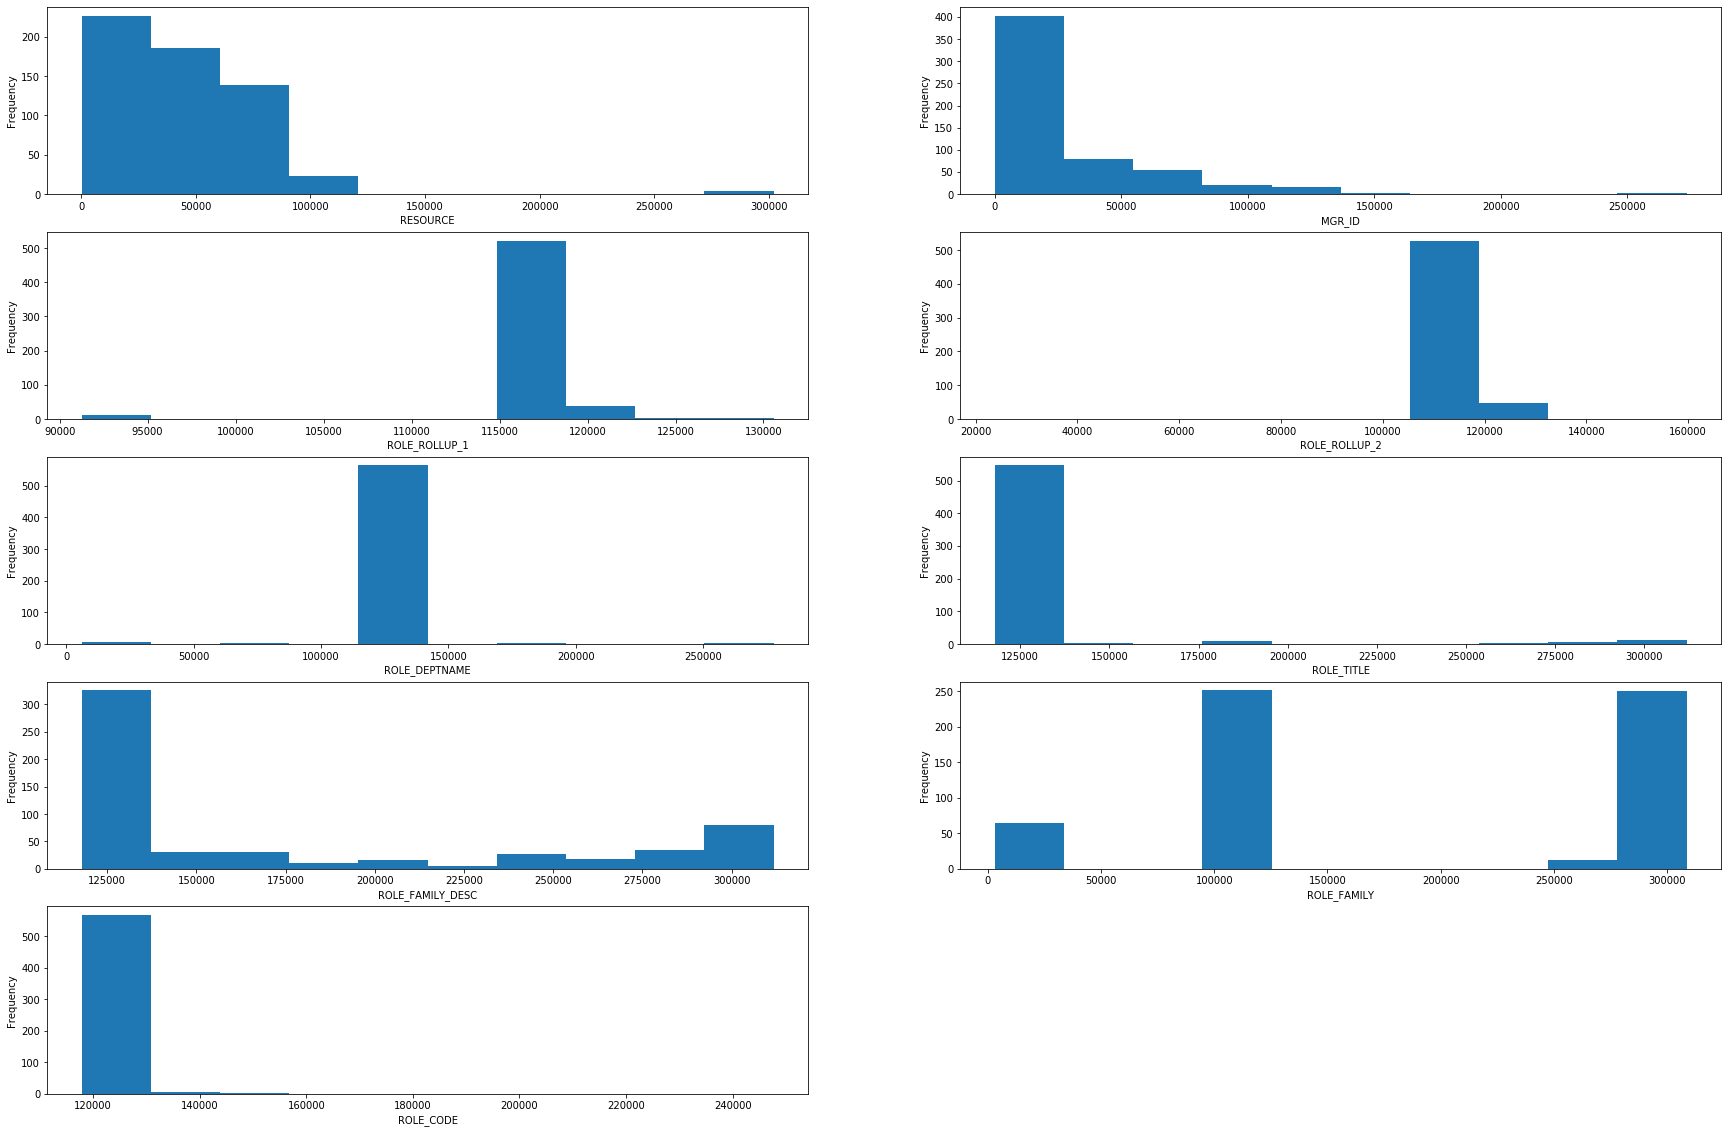

In [6]:
#Plotting Frequecy Graph
plt.figure(figsize=(30,20))
for i in range(1,10):
    plt.subplot(5,2,i)
    plt.hist(train[train.columns[i]])
    plt.xlabel(train.columns[i])
    plt.ylabel("Frequency")
plt.show()

In [7]:
import itertools
target = "ACTION"
train_col = [x for x in train.columns if x!=target]

col1 = 'ROLE_CODE'
col2 = 'ROLE_TITLE'

pair = len(train.groupby([col1,col2]).size())
single = len(train.groupby([col1]).size())

print(col1, col2, pair, single)

ROLE_CODE ROLE_TITLE 135 135


In [8]:
train_col = [x for x in train_col if x!='ROLE_TITLE']

In [9]:
#linear - OHE
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse=True, dtype=np.float32, handle_unknown='ignore')

In [10]:
x = ohe.fit_transform(train[train_col])
y = train["ACTION"].values

In [11]:
from sklearn.model_selection import cross_validate

model1 = LogisticRegression(
                penalty='l2',  
                C=1.0, 
                fit_intercept=True, 
                random_state=432,
                solver = 'liblinear',
                max_iter = 1000,
        )
stats = cross_validate(model1, x, y, groups=None, scoring='roc_auc', 
                       cv=5, n_jobs=2, return_train_score = True)
stats = pd.DataFrame(stats)
stats.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
fit_time,5.0,0.005615,0.002089,0.003448,0.003998,0.004987,0.007822,0.007822
score_time,5.0,0.002275,0.000440,0.001487,0.002447,0.002480,0.002480,0.002481
test_score,5.0,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
train_score,5.0,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [12]:
x2 = train.drop('ACTION',axis = 1)
y2 = train["ACTION"].values

In [13]:
model1.fit(x2,y2)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=432, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [14]:
y_pred = model1.predict(x2)
y_pred

array([1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [15]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred,y2)

1.0

In [16]:
x3 = test.iloc[:,:-9]
x3

,id
0,1
1,2
2,3
3,4
4,5
...,...
574,575
575,576
576,577
577,578


In [17]:
y3 = train.iloc[:,10:]
y3.head()

,MEM_SIZE
0,182
1,137
2,335
3,372
4,202


In [18]:
z3 = train.iloc[:,:-10]
z3.head()

,ACTION
0,1
1,1
2,1
3,1
4,1


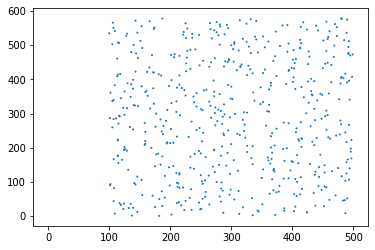

In [19]:
import matplotlib.pyplot as plt
plt.scatter(y3,x3,z3)
plt.show()